# Tutorial 1: Basics of CrypTen Tensors

We now have a high-level understanding of how secure MPC works. Through these tutorials, we will explain how to use CrypTen to carry out secure operations on encrypted tensors. In this tutorial, we will introduce a fundamental building block in CrypTen, called a ```CrypTensor```.  ```CrypTensors``` are encrypted ```torch``` tensors that can be used for computing securely on data. 

CrypTen currently only supports secure MPC protocols (though we intend to add support for other advanced encryption protocols). Using the ```mpc``` backend, ```CrypTensors``` act as ```torch``` tensors whose values are encrypted using secure MPC protocols. Tensors created using the ```mpc``` backend are called ```MPCTensors```. We will go into greater detail about ```MPCTensors``` in Tutorial 2. 

Let's begin by importing ```crypten``` and ```torch``` libraries. (If the imports fail, please see the installation instructions in the README.)

In [1]:
import crypten
import torch
from crypten.config import cfg
import timeit
import crypten.communicator as comm
from crypten.config import cfg
import logging
import matplotlib.pyplot as plt
import numpy as np

crypten.init()
logging.getLogger().setLevel(logging.INFO)

# comm.get().set_verbosity(True)
# ... do stuff ..
# comm.get().print_communication_stats()

/Users/memo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_diff(x, z_enc):
    diff = torch.abs(x - z_enc.get_plain_text()).numpy()
    relative = torch.abs((z_enc.get_plain_text()-x)/x)
    relative = relative[relative != float("inf")].numpy()
    relative = relative[~np.isnan(relative)]
    print(f"TAE: {diff.mean():e}, MRE: {relative.mean():e}, MAX: {diff.max():e}")
    # print(diff[:print_terms])
    plt.plot(diff)
num_iters = 1
print_terms = 1

def print_app(name, end_time, start_time):
    print(f"  {name}: {num_iters} iterations in {end_time - start_time} sec.") # : {z_enc.get_plain_text()[:print_terms]}")


torch.Size([64000])
Negative Exponential:
  Approx: 1 iterations in 0.022330458014039323 sec.
TAE: 7.149363e-05, MRE: 8.482303e-01, MAX: 3.611863e-03
  Bior: 1 iterations in 0.03994020802201703 sec.
TAE: 3.848229e-05, MRE: 8.755276e-01, MAX: 4.234135e-03


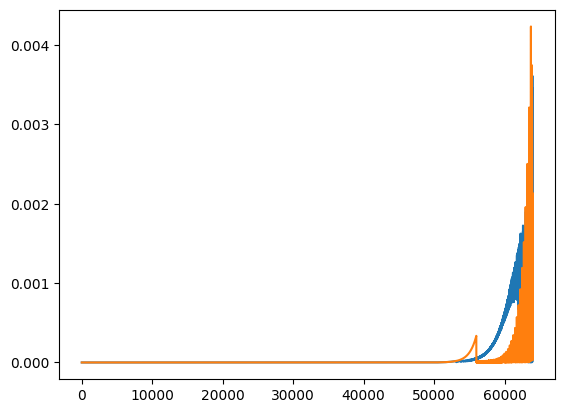

In [3]:
#Construct example input CrypTensor
x = torch.arange(-64, 0, 0.001)
# x = x.reshape([1600, 10])
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Negative Exponential:")
# print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print_app("Approx", timeit.default_timer(), start1)
    # print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
# with cfg.temp_override({"functions.exp_method": 'split', "functions.exp_all_neg": True}):
#     start1 = timeit.default_timer()
#     for _ in range(num_iters):
#         z_enc = x_enc.exp()  # Private
#     # print("  Nexp   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
#     print_app("Nexp", timeit.default_timer(), start1)
#     print_diff(x.exp(), z_enc)
# with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": True}):
#     start1 = timeit.default_timer()
#     for _ in range(num_iters):
#         z_enc = x_enc.exp()  # Private
#     # print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
#     print_app("Haar", timeit.default_timer(), start1)
#     print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    # print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(x.exp(), z_enc)

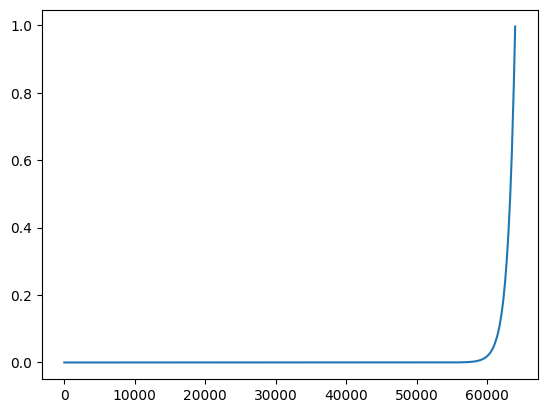

In [4]:
plt.plot(z_enc.get_plain_text())

torch.Size([54])
Exponential:
  Exact : tensor([0.0003])
  Approx: 1 iterations in 0.0024267499975394458 sec.: tensor([0.0003])
TAE: 1.832634e+01, MRE: 4.451242e-02, MAX: 3.100916e+02
  Haar  : 1 iterations in 0.006318915984593332 sec.: tensor([0.0003])
TAE: 1.754474e+02, MRE: 1.767645e+02, MAX: 2.032023e+03
  Bior  : 1 iterations in 0.0013481250207405537 sec.: tensor([0.0005])
TAE: 1.925104e+02, MRE: 1.298103e+02, MAX: 2.697282e+03


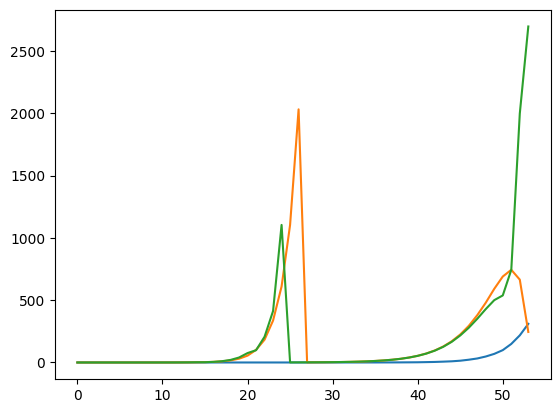

In [5]:
#Construct example input CrypTensor
x = torch.arange(-8, 8, 0.3)
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)


Reciprocal:
  Approx: 1 iterations in 0.08580054101184942 sec.
TAE: 2.540931e-04, MRE: 1.075607e-02, MAX: 9.541716e-04
  Log: 1 iterations in 0.2131632079835981 sec.
TAE: 8.060323e-05, MRE: 4.683538e-04, MAX: 7.796228e-03
  Haar: 1 iterations in 5.279130750015611 sec.
TAE: 6.494245e-05, MRE: 4.242793e-04, MAX: 7.751465e-03
  Bior: 1 iterations in 0.25472704198909923 sec.
TAE: 3.795877e-05, MRE: 3.027314e-04, MAX: 1.126099e-02


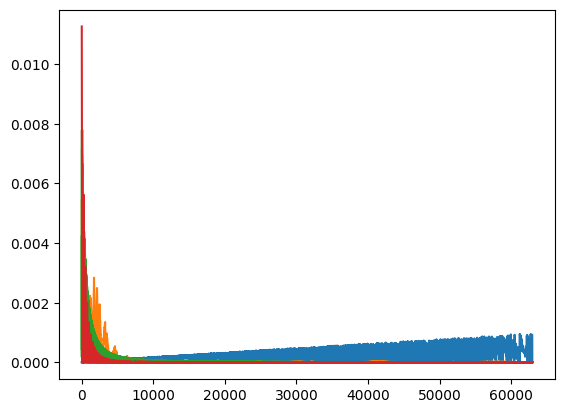

In [6]:
# x = torch.tensor([0.00005, 0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]) # , 5, 10, 50, 100 , 500, 1000, 5000, 10000, 50000])
x = torch.arange(1.0, 64, 0.001)
# x = x.reshape((63, 100))
x_enc = crypten.cryptensor(x)

print("\nReciprocal:")
# print("  Exact :", x.reciprocal()[:print_terms])
with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Approx", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'log', "functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Log", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)


Logarithm (LUT faster):
  Exact : tensor([-6.9078])
  Approx: 1 iterations in 0.20879591701668687 sec.: tensor([-9.7382])
TAE: 5.091761e-02, MRE: 4.982608e-02, MAX: 6.106107e+00
  Haar  : 1 iterations in 0.9208790420088917 sec.: tensor([-3.7713])
TAE: 2.366598e-03, MRE: 5.403309e-03, MAX: 3.136408e+00
  Bior  : 1 iterations in 0.25780700001632795 sec.: tensor([-8.0111])
TAE: 9.577860e-03, MRE: 5.412527e-03, MAX: 3.628440e+00


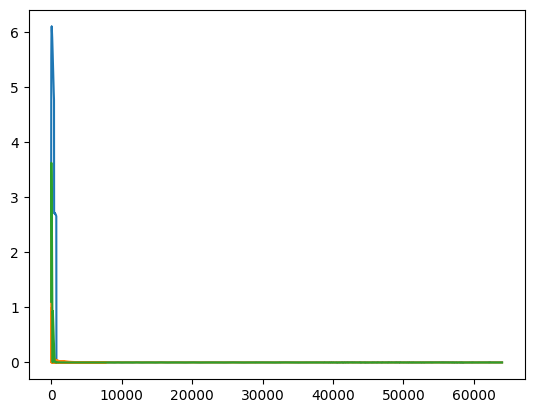

In [7]:
x = torch.arange(0.001, 64, 0.001)
x_enc = crypten.cryptensor(x)

print("\nLogarithm (LUT faster):")
print("  Exact :", x.log()[:print_terms])
with cfg.temp_override({"functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)

torch.Size([16000])

Square Root: (LUT faster)
  Exact : tensor([0.])
  Approx: 1 iterations in 0.031997499987483025 sec.: tensor([0.])
TAE: 3.312560e-03, MRE: 1.900414e-03, MAX: 4.005002e-02
  Haar   : 1 iterations in 0.20789037499343976 sec.: tensor([0.1667])
TAE: 3.859032e-03, MRE: 4.424263e-03, MAX: 1.666870e-01
  Bior   : 1 iterations in 0.07053758300025947 sec.: tensor([0.0594])
TAE: 9.304286e-04, MRE: 2.951761e-03, MAX: 7.328644e-02


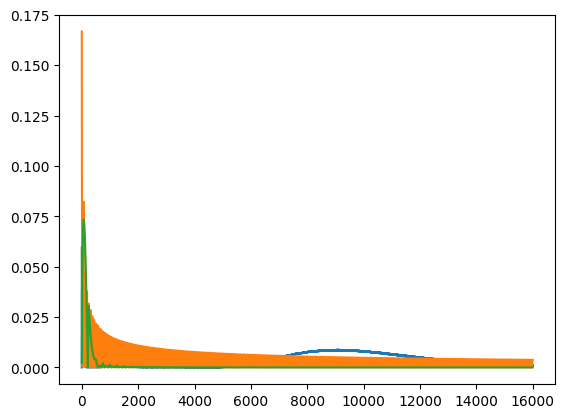

In [8]:
x = torch.arange(0.0, 16, 0.001)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSquare Root: (LUT faster)")
print("  Exact :", x.sqrt()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)

torch.Size([63999])

Inverse Square Root: (LUT faster)
  Exact : tensor([31.6228])
  Approx: 1 iterations in 0.07845383300445974 sec.: tensor([6.6806])
TAE: 2.356224e-03, MRE: 5.628088e-04, MAX: 2.494213e+01
  Haar   : 1 iterations in 0.9241446670203004 sec.: tensor([7.9092])
TAE: 4.136174e-03, MRE: 1.317897e-03, MAX: 2.371356e+01
  Bior   : 1 iterations in 0.9291922080155928 sec.: tensor([132.9271])
TAE: 6.281005e-02, MRE: 9.881573e-03, MAX: 1.097883e+02


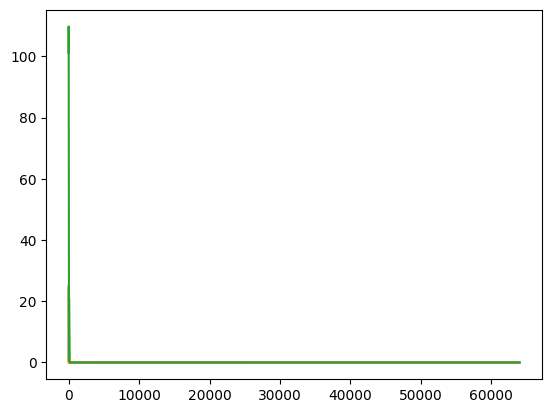

In [9]:
x = torch.arange(0.001, 64, 0.001)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nInverse Square Root: (LUT faster)")
print("  Exact :", x.sqrt().reciprocal()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)

torch.Size([64000])

Sin:
  Approx: 1 iterations in 0.09668887499719858 sec.: tensor([0.])
TAE: 8.542469e-01, MRE: 1.916847e+00, MAX: 5.528002e+00
  Haar  : 1 iterations in 0.22385566699085757 sec.: tensor([0.0156])
TAE: 4.997748e-03, MRE: 5.190610e-02, MAX: 1.571889e-02
  Bior  : 1 iterations in 0.04312883300008252 sec.: tensor([0.0002])
TAE: 1.298864e-03, MRE: 2.855242e-03, MAX: 5.162776e-03


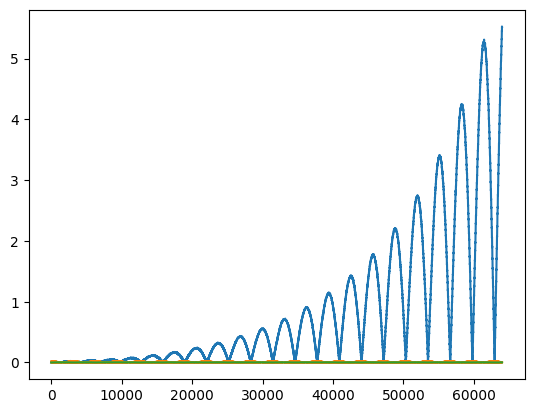

In [10]:
x = torch.arange(0, 64, 0.001)
# x = torch.rand((2, 2))
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSin:")
# print("  Exact :", x.sin()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)


Cos:
  Exact : tensor([1.])
  Approx: 1 iterations in 0.13763970899162814 sec.: tensor([1.])
TAE: 8.897241e-01, MRE: 1.959649e+00, MAX: 5.938161e+00
  Haar  : 1 iterations in 0.23780120798619464 sec.: tensor([0.9998])
TAE: 4.957701e-03, MRE: 5.930695e-02, MAX: 1.567387e-02
  Bior  : 1 iterations in 0.04329570900881663 sec.: tensor([1.0026])
TAE: 1.336654e-03, MRE: 3.306064e-03, MAX: 5.173981e-03


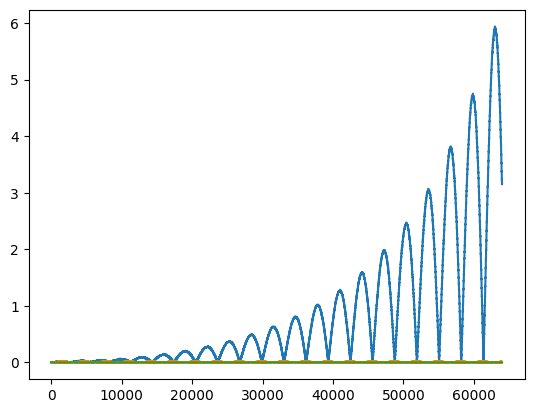

In [11]:
print("\nCos:")
print("  Exact :", x.cos()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)


Sigmoid:
  Exact : tensor([1.6038e-28])
  Approx: 1 iterations in 0.09158029098762199 sec.: tensor([1.5259e-05])
TAE: 6.985317e-05, MRE: 7.436594e+20, MAX: 2.703130e-03
  Haar  : 1 iterations in 1.9083876250078902 sec.: tensor([0.])
TAE: 3.198651e-05, MRE: 1.392279e+00, MAX: 1.953125e-03
  Bior  : 1 iterations in 0.15618049999466166 sec.: tensor([0.])
TAE: 9.526060e-06, MRE: 1.392247e+00, MAX: 5.016476e-04


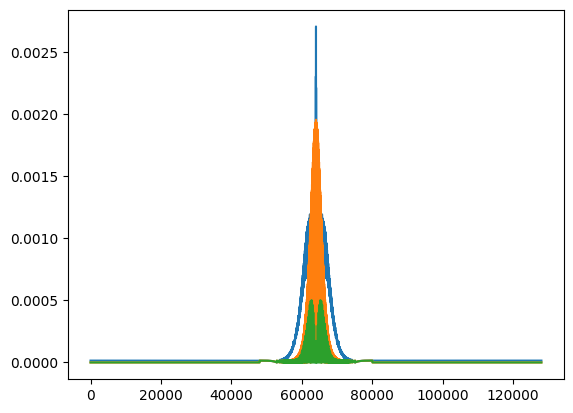

In [12]:
x = torch.arange(-64, 64, 0.001)
x_enc = crypten.cryptensor(x)

print("\nSigmoid:")
print("  Exact :", x.sigmoid()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)

Tanh:
  Exact : tensor([-1.])
  Approx: 1 iterations in 0.11016041599214077 sec.: tensor([-1.0000])
TAE: 8.504979e-05, MRE: 2.290649e+07, MAX: 4.906250e-03
  Haar  : 1 iterations in 1.7658523749851156 sec.: tensor([-1.])
TAE: 6.355388e-05, MRE: 4.581298e+07, MAX: 7.812500e-03
  Bior  : 1 iterations in 0.13749458402162418 sec.: tensor([-1.])
TAE: 3.452108e-05, MRE: 2.415919e+06, MAX: 3.889143e-03


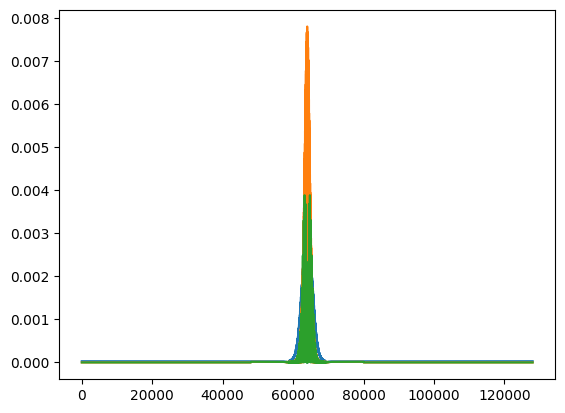

In [13]:
print("Tanh:")
print("  Exact :", x.tanh()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)

Erf:
  Exact : tensor([-1.])
  Approx: 1 iterations in 0.1739272919949144 sec.: tensor([98524.9453])
TAE: 8.074238e+07, MRE: 8.074302e+07, MAX: 3.066957e+08
  Haar  : 1 iterations in 1.7840277079958469 sec.: tensor([-1.])
TAE: 6.167771e-05, MRE: 4.928847e-04, MAX: 8.819580e-03
  Bior  : 1 iterations in 0.09951454098336399 sec.: tensor([-1.])
TAE: 1.561103e-04, MRE: 4.903678e-04, MAX: 1.643020e-02


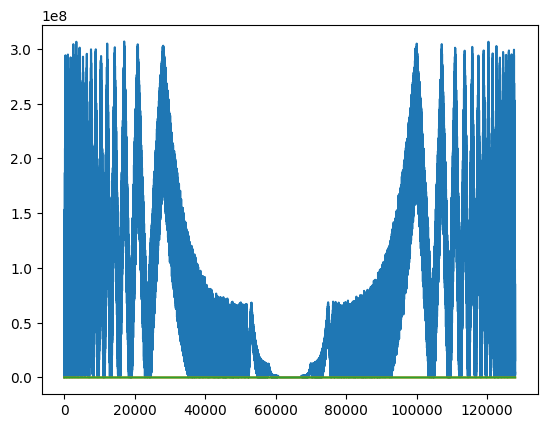

In [14]:
# x = torch.arange(-1, 1, 0.01)
# print(x.size())
# x_enc = crypten.cryptensor(x)

print("Erf:")
print("  Exact :", x.erf()[:print_terms])
with cfg.temp_override({"functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)


Gelu:
  Exact : tensor([-0.0000, -0.0000, -0.0000,  ..., 63.9970, 63.9980, 63.9990])
  Approx: 1 iterations in 0.1556117500003893 sec.
TAE: 3.697499e+08, MRE: 5.910950e+10, MAX: 1.073699e+09
  Erf: 1 iterations in 0.08925287501187995 sec.
TAE: 1.407880e-04, MRE: 3.115182e-02, MAX: 1.158456e-02
  Haar: 1 iterations in 0.2509989999816753 sec.
TAE: 4.481751e-05, MRE: 1.656812e+08, MAX: 7.675171e-03
  Bior: 1 iterations in 0.06056291700224392 sec.
TAE: 2.911503e-05, MRE: 4.282018e+07, MAX: 3.939874e-03


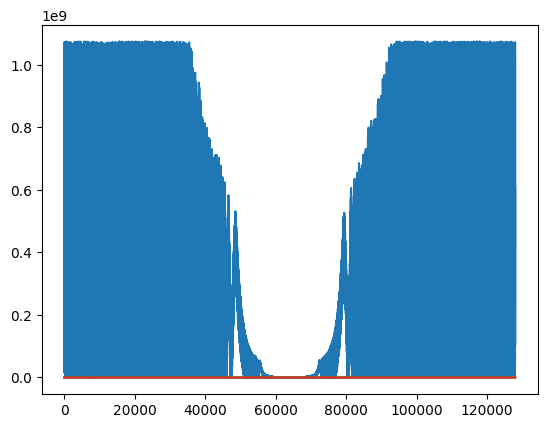

In [15]:
# x = torch.arange(start=1.01, end=10, step=0.01)
# x_enc = crypten.cryptensor(x)

gelu = x * (1 + (x / torch.sqrt(torch.tensor(2))).erf()) / 2
relu = x * (x > 0)

print("\nGelu:")
print("  Exact :", gelu)
with cfg.temp_override({"functions.gelu_method": 'erf', "functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Approx", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)
with cfg.temp_override({"functions.gelu_method": 'erf', "functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Erf", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)
with cfg.temp_override({"functions.gelu_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)
with cfg.temp_override({"functions.gelu_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)

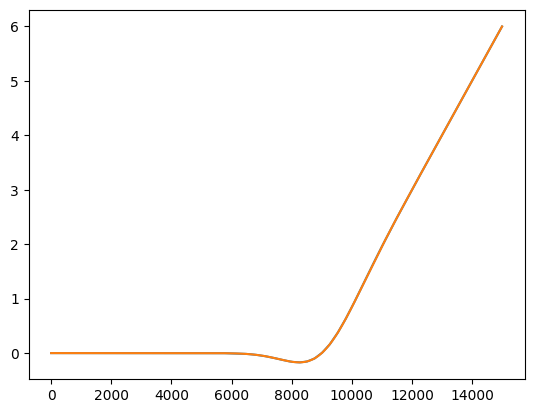

In [16]:
plt.plot(z_enc.get_plain_text()[55000:70000])
plt.plot(gelu[55000:70000])


Silu:
  Approx: 1 iterations in 0.6332753750029951 sec.
TAE: 3.590142e-01, MRE: 5.488147e+23, MAX: 7.207108e-01
  Sigmoid: 1 iterations in 0.16468466699006967 sec.
TAE: 3.710410e-05, MRE: 1.351435e+00, MAX: 8.265972e-04
  Haar: 1 iterations in 1.751425124995876 sec.
TAE: 3.693916e-05, MRE: 4.545507e+07, MAX: 3.875732e-03
  Bior: 1 iterations in 0.15150779200484976 sec.
TAE: 2.601743e-05, MRE: 1.431656e+07, MAX: 2.574161e-03


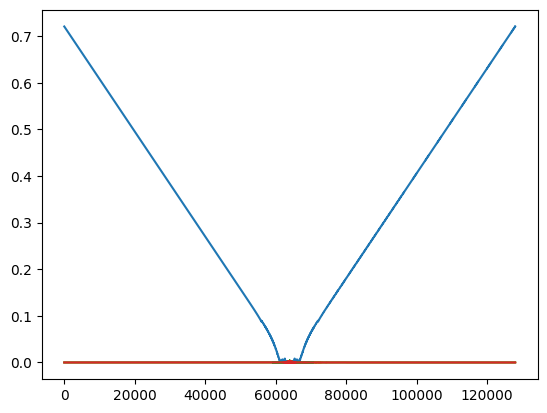

In [17]:
# x = torch.arange(-8, 8, 0.1)
# x_enc = crypten.cryptensor(x)

silu = x * x.sigmoid()
relu = x * (x > 0)

print("\nSilu:")
# print("  Exact :", silu)
with cfg.temp_override({"functions.silu_method": 'sigmoid', "functions.sigmoid_tanh_method": 'reciprocal'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Private
    print_app("Approx", timeit.default_timer(), start1)
    print_diff(silu, z_enc)
with cfg.temp_override({"functions.silu_method": 'sigmoid', "functions.sigmoid_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Private
    print_app("Sigmoid", timeit.default_timer(), start1)
    print_diff(silu, z_enc)
with cfg.temp_override({"functions.silu_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Private
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(silu, z_enc)
with cfg.temp_override({"functions.silu_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Privat6
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(silu, z_enc)

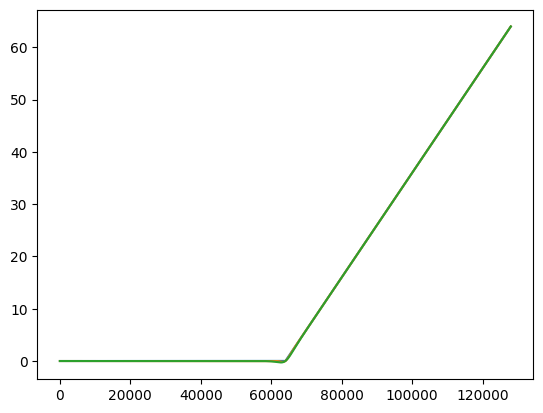

In [18]:
plt.plot(relu)
plt.plot(gelu)
plt.plot(silu)

#### Advanced mathematics
We are also able to compute more advanced mathematical functions on ```CrypTensors``` using iterative approximations. CrypTen provides MPC support for functions like reciprocal, exponential, logarithm, square root, tanh, etc. Notice that these are subject to numerical error due to the approximations used. 

Additionally, note that some of these functions will fail silently when input values are outside of the range of convergence for the approximations used. These do not produce errors because value are encrypted and cannot be checked without decryption. Exercise caution when using these functions. (It is good practice here to normalize input values for certain models.)